Visualizer for simulated dynamic adaptive networks

Access: datafiles with adj matrices+culture vecs

In [13]:
import generator as gen
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x = []
y = []
for i in range(500):
    vec = gen.sample_n_sphere_surface(2)
    x.append(vec[0])
    y.append(vec[1])

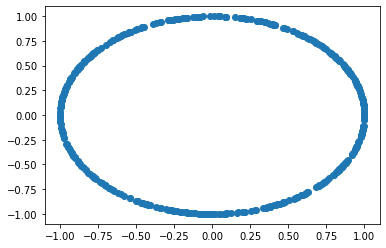

In [26]:
plt.scatter(x,y)
plt.show()

In [24]:
vecs[0][0,]

-0.35844141213179503

In [22]:
vecs[:][0

TypeError: list indices must be integers or slices, not tuple